In [142]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from testCases import *

In [144]:
X, Y = load_planar_dataset()

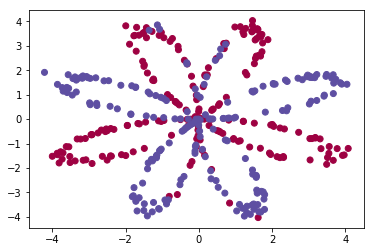

In [145]:
plt.scatter(X[0, :], X[1, :], c=Y[0], cmap=plt.cm.Spectral)

In [146]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

print('The shape of X is: ' + str(shape_X))
print('The shape of Y is: ' + str(shape_Y))
print('We have m = %d training examples' %(m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
We have m = 400 training examples


In [147]:
clf = linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

/home/kartik/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of logistic Regression: 47%


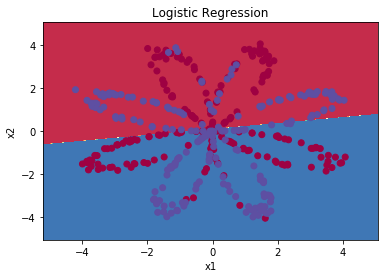

In [148]:
plot_decision_boundary(lambda x:clf.predict(x), X, Y[0])
plt.title("Logistic Regression")

LR_predictions = clf.predict(X.T)
print('Accuracy of logistic Regression: %d' %float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100)+'%')

In [149]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return n_x, n_h, n_y

In [150]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1":  W1,
                 "b1": b1,
                 "W2": W2,
                 "b2": b2}
    
    return parameters

In [151]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2}
    
    return A2, cache

In [152]:
n_x, n_h, n_y = layer_sizes(X,Y)
parameters = initialize_parameters(n_x, n_h, n_y)
A2, cache = forward_propagation(X, parameters)
A2.shape

(1, 400)

In [153]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = -np.sum(logprobs)/m
    
    assert(isinstance(cost, float))
    
    return cost

In [154]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = 1/m*np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = 1/m*np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}
    
    return grads

In [155]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [156]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i%1000 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
        
    return parameters

In [157]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = sigmoid(cache['Z2'])
    
    return predictions

Cost after iteration 0: 0.693143
Cost after iteration 1000: 0.281308
Cost after iteration 2000: 0.268974
Cost after iteration 3000: 0.261990
Cost after iteration 4000: 0.257426
Cost after iteration 5000: 0.254274
Cost after iteration 6000: 0.251993
Cost after iteration 7000: 0.250279
Cost after iteration 8000: 0.248951
Cost after iteration 9000: 0.247894


Text(0.5,1,'Decision Boundary for hidden layer size 4')

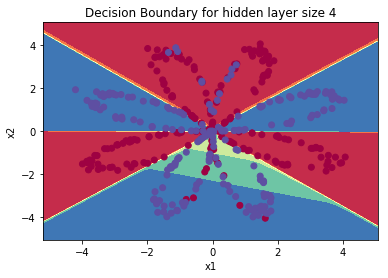

In [158]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# # Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0])
plt.title("Decision Boundary for hidden layer size " + str(4))